In [1]:
import numpy as no
import pandas as pd

In [3]:
data_students = pd.read_csv("clean_students_complete.csv")

In [8]:
#data_students.set_index("Student ID", inplace=True)
data_students=data_students.drop(["Unnamed: 0"], axis=1)

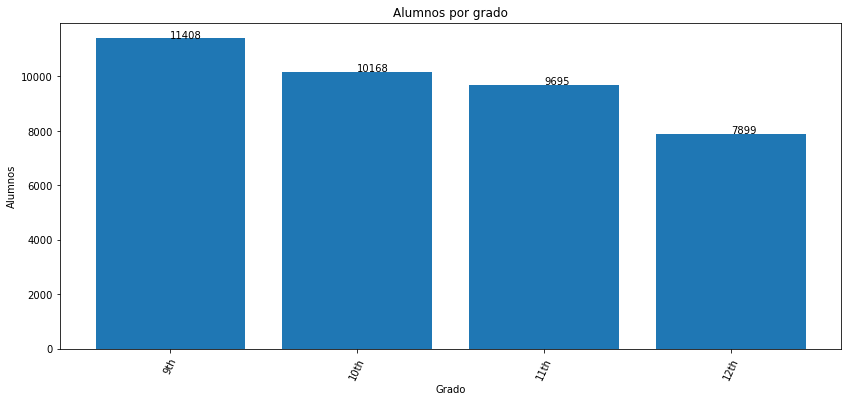

In [51]:
import matplotlib.pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
grades = data_students["grade"].value_counts().rename_axis('grade').reset_index(name='counts')
grades

x=grades["grade"]
y=grades["counts"]
plt.figure(figsize=(14,6))
plt.bar(x,y)
labels(x,y)
plt.title("Alumnos por grado")
plt.xlabel("Grado")
plt.ylabel("Alumnos")
plt.xticks(rotation=65)
plt.show()

In [46]:
reading_min=data_students[data_students["reading_score"]==data_students["reading_score"].min()]
reading_max=data_students[data_students["reading_score"]==data_students["reading_score"].max()]

reading_school_min = reading_min["school_name"].value_counts().rename_axis('school').reset_index(name='counts')
reading_school_max = reading_max["school_name"].value_counts().rename_axis('school').reset_index(name='counts')

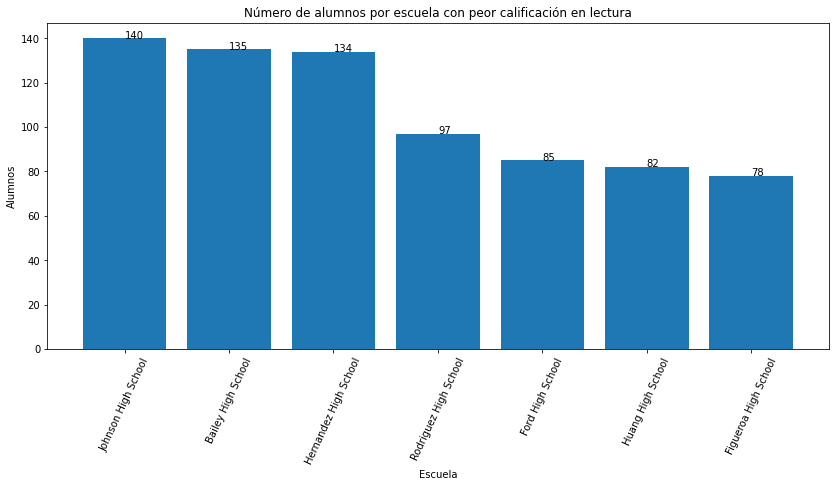

In [49]:
x=reading_school_min["school"]
y=reading_school_min["counts"]
plt.figure(figsize=(14,6))
plt.bar(x,y)
labels(x,y)
plt.title("Número de alumnos por escuela con peor calificación en lectura")
plt.xlabel("Escuela")
plt.ylabel("Alumnos")
plt.xticks(rotation=65)
plt.show()

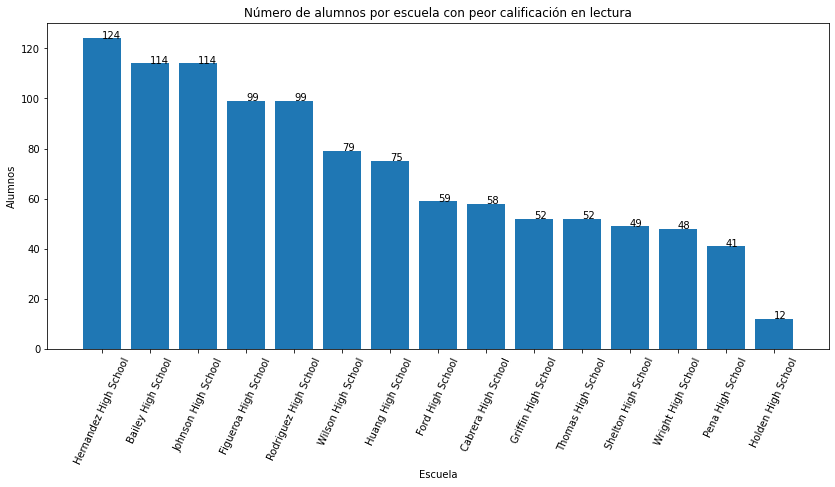

In [50]:
x=reading_school_max["school"]
y=reading_school_max["counts"]
plt.figure(figsize=(14,6))
plt.bar(x,y)
labels(x,y)
plt.title("Número de alumnos por escuela con peor calificación en lectura")
plt.xlabel("Escuela")
plt.ylabel("Alumnos")
plt.xticks(rotation=65)
plt.show()

<AxesSubplot:xlabel='school_name,grade,gender'>

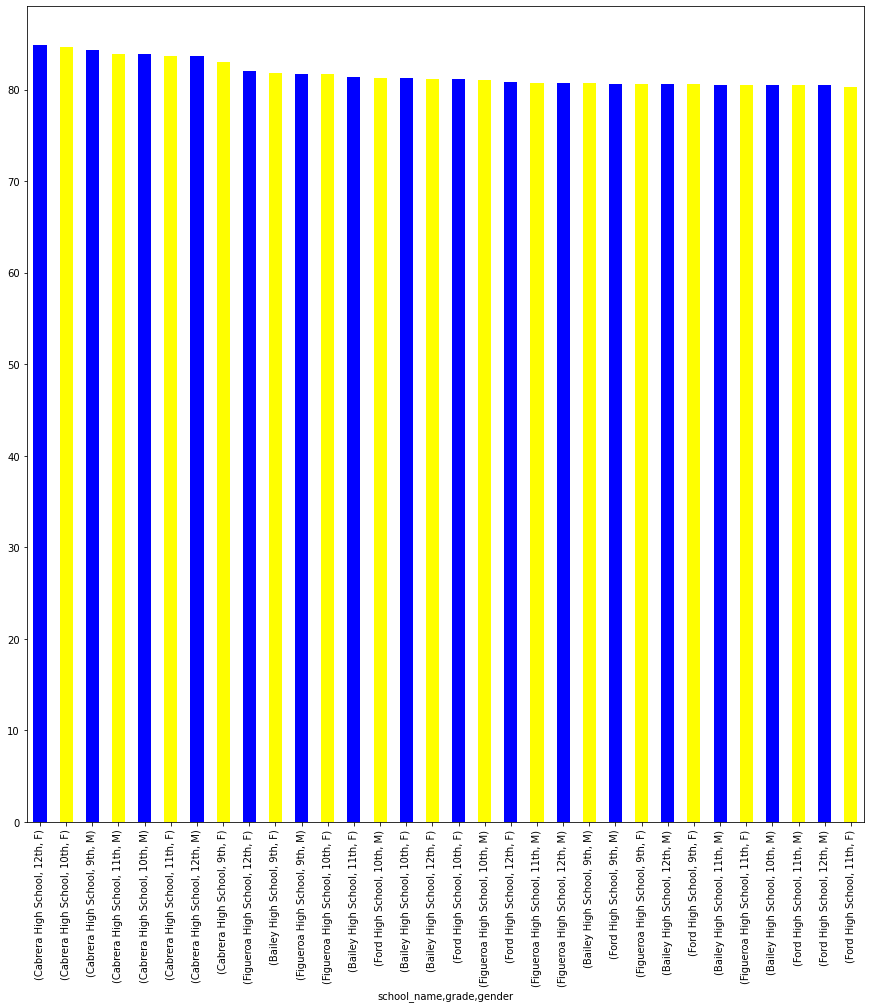

In [83]:
agrupado = data_students.groupby(["school_name","grade","gender"])["reading_score"].mean().head(32).sort_values(ascending=False)
agrupado.plot.bar(figsize=(15,15),color=["blue","yellow"])

In [97]:
def cat_subject (row, subject):
    if row[subject] >= 70 :
        return 'Aprobado'
    else:
        return "Reprobado"

In [101]:
data_students["cat_read"] = data_students.apply(cat_subject, subject="reading_score", axis=1)
data_students["cat_math"] = data_students.apply(cat_subject, subject="math_score", axis=1)
data_students

,student_name,gender,grade,school_name,reading_score,math_score,cat_read,cat_math
Student ID,,,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79,Reprobado,Aprobado
1,Victor Smith,M,12th,Huang High School,94,61,Aprobado,Reprobado
2,Kevin Rodriguez,M,12th,Huang High School,90,60,Aprobado,Reprobado
3,Richard Scott,M,12th,Huang High School,67,58,Reprobado,Reprobado
4,Bonnie Ray,F,9th,Huang High School,97,84,Aprobado,Aprobado
...,...,...,...,...,...,...,...,...
39165,Donna Howard,F,12th,Thomas High School,99,90,Aprobado,Aprobado
39166,Dawn Bell,F,10th,Thomas High School,95,70,Aprobado,Aprobado
39167,Rebecca Tanner,F,9th,Thomas High School,73,84,Aprobado,Aprobado


<AxesSubplot:ylabel='cat_read'>

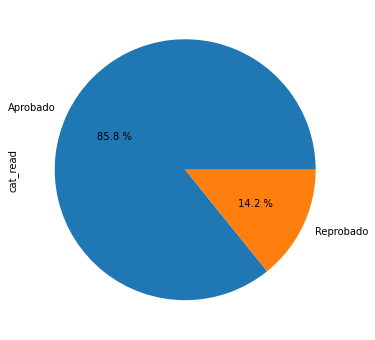

In [102]:
nombres = data_students["cat_read"].unique().tolist()
nombres.sort(reverse=False)
data_students["cat_read"].value_counts().plot.pie(figsize=(11,6),labels=nombres,autopct="%0.1f %%")

<AxesSubplot:ylabel='cat_math'>

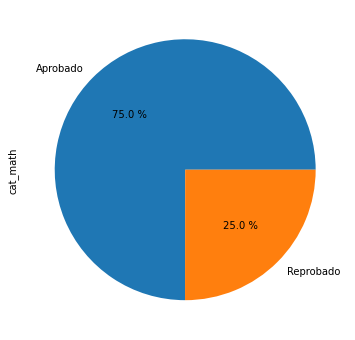

In [103]:
nombres = data_students["cat_math"].unique().tolist()
nombres.sort(reverse=False)
data_students["cat_math"].value_counts().plot.pie(figsize=(11,6),labels=nombres,autopct="%0.1f %%")